In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [2]:
#Data taken from Kaggle competition
data=pd.read_csv('train.csv')
data1=pd.read_csv('test.csv')
data.shape


(891, 12)

# Exploring the data

In [3]:
#Total feattures
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#PassengerID— A column added by Kaggle 
#Survived— Whether the passenger survived or not (0=No, 1=Yes)
#Pclass— The class of the passenger travelling (1=1st(upper), 2=2nd(Middle), 3=3rd(lower))
#Name- name of passengers
#Sex— The passenger’s sex
#Age-Passengers age in year
#SIbSp- The number of siblings or spouses.[Need to find out with surname,or ticket but still exist consistancy]
#Parch— The number of parents or children.[NANNY??]
#Ticket _ Ticket number is provided
#Fare
#Cabin- The passenger’s cabin number
#Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
#Checking the number of null value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
set(data['Survived']) # We need to predict


{0, 1}

In [7]:
set(data['Pclass'])

{1, 2, 3}

In [8]:
data.shape

(891, 12)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


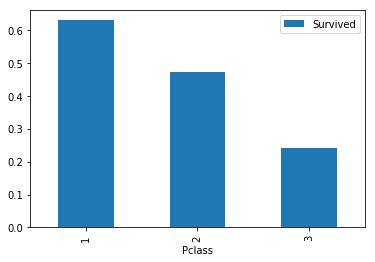

In [9]:
#Impact of Pclass on Survival

print(data[['Pclass','Survived']].groupby(['Pclass']).mean())

p=data.pivot_table(index="Pclass",values="Survived")
p.plot.bar()



# From above we can interpret that people in upper class have higher survival rate but graph of count plot and sum shows dif count

In [10]:
set(data['Sex'])

{'female', 'male'}

        Survived
Sex             
female  0.742038
male    0.188908


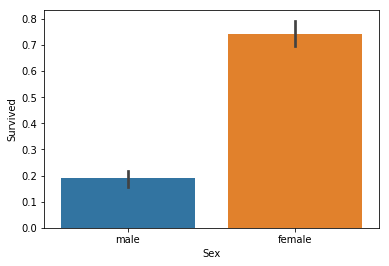

In [11]:
#Impact of Sex on survival

print(data[['Sex','Survived']].groupby(['Sex']).mean())
sns.barplot(x=data["Sex"], y=data["Survived"], data=data)


# Survival of male is very less compaired to female.

In [12]:
#Age cotain missing value we are replacing it with median
data['Age'].isnull().sum()



177

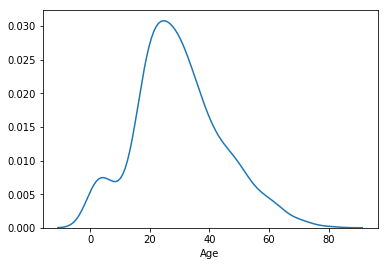

In [13]:
sns.distplot(data.Age.dropna(),hist=False);

#Above graph shows the age is slightly right skewed inorder to reduce the skewness we are replacing NAN value with median.
#As median is uneffected by the the maginitude of extreme value so here we consider median for analysis of Age/filling null value

In [14]:

data['Age'].median()


28.0

In [15]:
data['Age']=np.where(data['Age'].isnull(),28,data['Age'])


In [16]:
data['Age'].value_counts()
"""As the age contain more unique value for analysis we are taking the age 
in to bins for normalizing the data"""
cut_points = [-1,0,12,20,40,60,100]
label_names = ["Missing","Child","Teenager","Young Adult","Adult","Senior"]
data["Age_categories"] = pd.cut(data["Age"],cut_points,labels=label_names)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


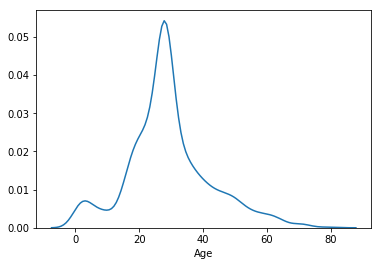

In [17]:
sns.distplot(data.Age.dropna(),hist=False)

                Survived
Age_categories          
Missing              NaN
Child           0.579710
Teenager        0.381818
Young Adult     0.364769
Adult           0.390625
Senior          0.227273


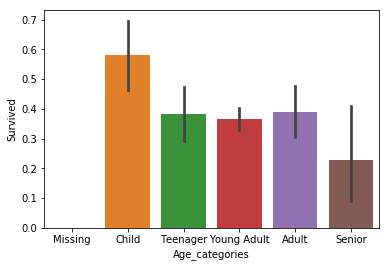

In [18]:

print(data[["Age_categories",'Survived']].groupby(["Age_categories"]).mean())
sns.barplot(x=data["Age_categories"], y=data["Survived"], data=data)


# From age group analysis mostly survived are under the age group 0-12 and followed by 40-60,20-40 then  12-20, 

In [19]:
#For analysis we are grouping the Cabin according with the starting alphabet

In [20]:
x=data['Cabin'].astype(str)
data['Cabin']=[x[0] for x in x]


In [21]:
set(data['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

       Survived
Cabin          
A      0.466667
B      0.744681
C      0.593220
D      0.757576
E      0.750000
F      0.615385
G      0.500000
T      0.000000
n      0.299854


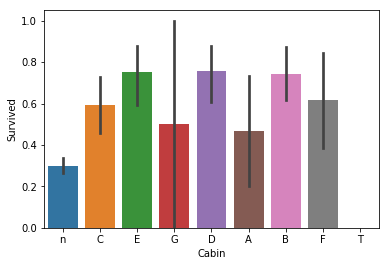

In [22]:
#Analysing which on basis of cabin
print(data[['Cabin','Survived']].groupby(['Cabin']).mean())
sns.barplot(x=data['Cabin'],y=data['Survived'],data=data)


In [23]:
set(data['Embarked'])

{'C', 'Q', 'S', nan}

In [24]:
data[data['Embarked'].isnull()] 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Young Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Senior


## Converting Categorical Features
#we are not droping any of the feature

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             891 non-null object
Embarked          889 non-null object
Age_categories    891 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [26]:
# Here we are using one hot encoding This has the benefit of not weighting a value improperly.
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.dtypes

male    uint8
dtype: object

In [27]:
set(data['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

In [28]:
cabin = pd.get_dummies(data['Cabin'],drop_first=True)
cabin.dtypes

B    uint8
C    uint8
D    uint8
E    uint8
F    uint8
G    uint8
T    uint8
n    uint8
dtype: object

In [29]:
#Using  LabelBinarizer sex = pd.get_dummies(data['Sex'],drop_first=True)


In [30]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_Cabin = lb.fit_transform(data['Cabin'])
lb_Cabin#Array format
lb_Cabin=pd.DataFrame(lb_Cabin, columns=lb.classes_).head()
lb_Cabin.astype(int)
lb_Cabin.dtypes


A    int32
B    int32
C    int32
D    int32
E    int32
F    int32
G    int32
T    int32
n    int32
dtype: object

In [31]:
AgeC = pd.get_dummies(data['Age_categories'],drop_first=True)
AgeC.dtypes

Child          uint8
Teenager       uint8
Young Adult    uint8
Adult          uint8
Senior         uint8
dtype: object

In [32]:
lb = LabelBinarizer()
lb_Age = lb.fit_transform(data['Age_categories'])

lb_Age=pd.DataFrame(lb_Age, columns=lb.classes_).head()
lb_Age.astype(int)
lb_Age

,Adult,Child,Senior,Teenager,Young Adult
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [33]:
Emb = pd.get_dummies(data['Embarked'],drop_first=True)
Emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
train=data.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,Young Adult


In [35]:
train.drop(["Survived","PassengerId",'Name','Sex','Ticket','Fare','Cabin','Embarked','Age_categories','Age'],axis=1,inplace=True)

In [36]:
train= pd.concat([train,sex,cabin,AgeC,Emb],axis=1)


In [37]:
train.dtypes


Pclass         int64
SibSp          int64
Parch          int64
male           uint8
B              uint8
C              uint8
D              uint8
E              uint8
F              uint8
G              uint8
T              uint8
n              uint8
Child          uint8
Teenager       uint8
Young Adult    uint8
Adult          uint8
Senior         uint8
Q              uint8
S              uint8
dtype: object

In [38]:
train.columns

Index(['Pclass', 'SibSp', 'Parch', 'male', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'n', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Q', 'S'],
      dtype='object')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
male           891 non-null uint8
B              891 non-null uint8
C              891 non-null uint8
D              891 non-null uint8
E              891 non-null uint8
F              891 non-null uint8
G              891 non-null uint8
T              891 non-null uint8
n              891 non-null uint8
Child          891 non-null uint8
Teenager       891 non-null uint8
Young Adult    891 non-null uint8
Adult          891 non-null uint8
Senior         891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: int64(3), uint8(16)
memory usage: 34.9 KB


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Initialize the logistic regression model
logmodel= LogisticRegression()


In [42]:
# Train the model
logmodel.fit(X=pd.DataFrame(train),
             y= data["Survived"])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = logmodel.predict(train)


In [44]:

pd.crosstab(predictions,data['Survived'])


Survived,0,1
row_0,,
0,478,92
1,71,250


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predictions,data['Survived'])) 
print(classification_report(predictions,data['Survived']))

[[478  92]
 [ 71 250]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       570
           1       0.73      0.78      0.75       321

   micro avg       0.82      0.82      0.82       891
   macro avg       0.80      0.81      0.80       891
weighted avg       0.82      0.82      0.82       891



In [46]:
logmodel.score(train,
               data['Survived'])

0.8170594837261503

#Using Train_Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [49]:
logmodel1 = LogisticRegression()
logmodel1.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
predictions = logmodel1.predict(X_test)


In [51]:
from sklearn.metrics import confusion_matrix


In [52]:

accuracy=confusion_matrix(y_test,predictions)

In [53]:
accuracy

array([[135,  19],
       [ 38,  76]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7873134328358209